<a href="https://colab.research.google.com/github/risker93/Hello_World/blob/main/2021_06_27_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%EC%B1%85~104P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#자연어 처리 개발 준비
##텐서플로우

###더미 데이터를 활용한 감정 분석 모델링

In [1]:
import tensorflow as tf
from tensorflow.keras import preprocessing

In [6]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']

In [7]:
labels = [[1],[0],[1],[1],[0],[1]]

In [29]:
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

word_index=tokenizer.word_index

In [9]:
batch_size = 2
num_epochs = 100
vocab_size = len(word_index)+1
emb_size = 128
hidden_dimension = 256
output_dimension = 1

In [15]:
from tensorflow import keras

In [23]:
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, emb_size, input_length = 4))
model.add(keras.layers.Lambda(lambda x:tf.reduce_mean(x, axis = 1)))
model.add(keras.layers.Dense(hidden_dimension, activation='relu'))
model.add(keras.layers.Dense(output_dimension, activation='sigmoid'))

In [20]:
model = tf.keras.Sequential([
keras.layers.Embedding(vocab_size, emb_size, input_length=4),
keras.layers.Lambda(lambda x:tf.reduce_mean(x, axis = 1)),
keras.layers.Dense(hidden_dimension, activation = 'relu'),
keras.layers.Dense(output_dimension, activation='sigmoid')])

구현한 모델을 보면 입력값을 임베딩 하는 Embedding 층을 모델에 추가

임베딩된 각 단어의 벡터를 평균하기 위해 람다(Lambda)층을 사용

람다 층은 텐서플로 연산을 Sequantial API 와 Functional API에 적용하기 위해 사용하는 방법

평균의 경우 하나의 층으로 정의돼 있지 않기 때문에 람다 층을 활용해 해당 층에 들어오는 입력값들을 평균한다.

평균을 낸 후 하나의 은닉층을 통과한 후 최종 출력값을 뽑기 위 해 두개의 Dense 층을 모델에 추가한다.

최종 출력값을 뽑은 Dense층의 경우 0과 1 사이에 확률값을 뽑기 위해 활성화 함수를 시그모이드 함수로 정의.



In [24]:
#model 학습
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

컴파일 메서드를 통해 학습과정을 정의

옵티마이저는 아담 최적화 알고리즘을 사용

학습은 이진 분류 문제이므로 이진 교차 엔트로피 손실함수 사용

모델의 성능을 측정하기 위한 기준으로 이진 분류의 평가 지표로 가장 널리 사용되는 정확도를 사용

In [31]:
#model.fit(input_sequences, labels, epochs=num_epochs, batch_size=batch_size)

In [34]:
#Sequential API가 아닌 Funtional API, Subclassing 방법으로 동일한 모델을 구현해 보고 학습해보자

inputs = keras.layers.Input(shape=(4, ))
embed_output = keras.layers.Embedding(vocab_size, emb_size)(inputs)
pooled_output = tf.reduce_mean(embed_output, axis=1)
hidden_layer = keras.layers.Dense(hidden_dimension, activation='relu')(pooled_output)
outputs = keras.layers.Dense(output_dimension, activation='sigmoid')(hidden_layer)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model.fit(input_sequences, labels, epochs=num_epochs, batch_size=batch_size)

Functional API는 케라스의 입력층을 구현한 후 각 값을 다음 레이어들을 호출하면서 인자로 넣는 방식으로 구현

구현 방법에서 차이가 있을 뿐 모델 연산 흐름이나 로직이 변경된 것은 아니므로 결과는 동일

다음은 Subclassing 방법

In [38]:
class CustomModel(tf.keras.Model):

  def __init__(self, vocab_size, embed_dimension, hidden_dimension, output_dimension):
    super(CustomModel, self).__init__(name='my_model')
    self.embedding = keras.layers.Embedding(vocab_size, embed_dimension)
    self.dense_layer = keras.layers.Dense(hidden_dimension, activation='relu')
    self.output_layer = keras.layers.Dense(output_dimension, activation='sigmoid')

  def call(self, inputs):
    x = self.embedding(inputs)
    x = tf.reduce_mean(x, axis=1)
    x = self.dense_layer(x)
    x = self.ouput_layer(x)

    return x

model = CustomModel(vocab_size = vocab_size,
                    embed_dimension = emb_size,
                    hidden_dimension = hidden_dimension,
                    output_dimension = output_dimension)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.fit(input_sequences, labels, epochs=num_epochs, batch_size=batch_size)

##사이킷런

딥러닝 모델을 텐서플로, 케라스, 파이토치 등을 이용해서 생성할 수 있는 것 처럼

머신러닝 모델은 주로 사이킷런 라이브러리를 통해 만들어 낼 수 있다.

사이킷런 라이브러리는 지도학습을 위한 모듈, 비지도 학습을 위한 모듈, 모델 선택 및 평가를 위한 모듈, 데이터 변환 및 데이터 불러오기 위한 모듈, 계산 성능 향상을 위한 모듈로 구성.

지도 학습 모듈로 나이브베이즈 , 의사결정 나무, 서포트벡터머신 등

비지도 학습 모듈에는 군집화, 가우시안 혼합 모델 등

모델 선택과 평가 모듈에서는 교차검증, 모델평가(Model evaluation)

모델의 지속성을 위해 모델 저장과 불러오기를 위한 기능 등을 제공 

데이터 변환 모듈에서는 파이프라인, 특징추출, 전처리, 차원축소 등의 기능 제공

기본제공 데이터로는 당뇨병, 아이리스, 유방암 등



In [39]:
import sklearn

여기서는 하나의 뎅터에 대해 두가지 분류 모델을 만들 것이다.

하나는 지도학습 모델인 k 최근접 이웃 분류기

다른 하나는 비지도 핛십인 k 평균 군집하 모델이다.

In [40]:
#붓꽃 데이터를 불러온다.

from sklearn.datasets import load_iris

In [41]:
#변수에 할당하고 데이터가 어떤 값으로 구성돼 있는지 출력해 보자
iris_dataset = load_iris()

In [46]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [47]:
#우선 data 값을 확인해 보자
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
iris_dataset['data'].shape
#150개의 데이터가 각 각 4개의 특징값을 가지고 있는 형태이다

(150, 4)

In [52]:
#4개의 특징값이 의미하는 바를 확인하기 위해 feature_names  값을 확인해 보자
iris_dataset['feature_names']
#꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
#target에 대해 알아보자
print(iris_dataset['target'])
print(iris_dataset['target_names'])
#target 은 데이터에 대한 정답, 즉 라벨값
#target_names 는 붓꽃의 세 종인 Setosa, Versicolor, Virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [57]:
#마지막으로 DESCR에 대해 알아보자
print(iris_dataset['DESCR'])
#Description의 약자로 해당 데이터에 대한 전체적인 요약 정보

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

###사이킷런을 이용한 데이터 분리

In [59]:
from sklearn.model_selection import train_test_split

In [63]:
#train_test_split 함수에 학습 데이터와 라벨을 넣으면 정의한 비율로 데이터를 나눈다
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'],
                                                                    iris_dataset['target'],
                                                                    test_size=0.25, random_state=42)

#이 함수가 데이터를 나눌때 무작위로 데이터를 선택해서 나누는데, 이때 무작위로 선택되는 것을 제어할수 있는 값이 random_state
#함수를 여러번 사용하더라도 이 값을 독같이 설정할 경우 동일한 데이터를 선택해 분리

In [64]:
train_input.shape

(112, 4)

In [65]:
train_label.shape

(112,)

In [66]:
test_input.shape

(38, 4)

In [67]:
test_label.shape

(38,)

###사이킷런을 이용한 지도학습

지도학습은 각 데이터에 대해 정답이 있는 경우 각 뎅이터의 정답을 예측할 수 있게 학습시키는 과정

k 최근접 이웃 분류기는 예측 하고자 하는 데이터에 대해 가장 가까운 거리에 있는 데이터의 라벨과 같다고 예측하는 방법

데이터에 대한 사전 지식이 없는 경우의 분류에 많이 사용

여기서 k값은 예측하고자 하는 데이터와 가까운 몇 개의 데이터를 참고할 것인지를 의미

특징은
- 데이터에 대한 가정이 없어 단순

- 다목적 분류와 회귀에 좋다

- 높은 메모리를 요구

- k값이 커지면 계산이 늦어질 수 있다.

- 관련없는 기능의 데이터 규모에 민감.

In [69]:
#k 최근접 이웃 분류기를 직접 만들어보자
#객체를 불러와 변수에 할당.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
#분류기를 생성시 인자값으로 n_neighbors 값을 받는데 이 값은 k값을 의미

In [71]:
knn.fit(train_input, train_label)
#fit 함수를 사용해 분류기 모델에 학습 데이터와, 라벨값을 적용하면 모델학습이 간단히 끝난다.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
#학습시킨 모델을 사용해 새로운 데이터의 라벨을 예측해보자
#우선 새롭게 4개의 피처값을 임의로 설정해서 넘파이 배열로 만들자.

import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])

In [74]:
#이 값으로 분류기 모델의 predict 함수를 사용해 결과를 예측해 보자.
knn.predict(new_input)
#1(Versicolor)로 예측하고 있음.

array([1])

In [75]:
#이전에 따로 분리해둔 평가 데이터를 사용해 모델의 성능을 측정해보자.

predict_label = knn.predict(test_input)
print(predict_label)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [78]:
#예측값과 실제값을 비교해서 정확도를 측정해보자

print('test accuracy {:.2f}'.format(np.mean(predict_label==test_label)))
#정확도가 1, 100%의 정확도.

test accuracy 1.00


###사이킷런을 이용한 비지도 학습

k 평균 군집화 모델을 사용

군집화란 데이터를 특성에 따라 여러 집단으로 나눈는 방법.

붓꽃 데이터의 경우에는 3개의 정답이 있으므로 3개의 군집으로 나누는 방법을 사용해야함

군집화 방법중 가장 간단하고 널리 사용되는 군집화 방법

데이터 안에서 대표하는 군집의 중심을 찾는 알고리즘

알고리즘은 계속 반복적으로 수행되는데 우선 k개 만큼의 중심을 임의로 설정

모든 데이터를 가장 가까운 중심에 할당, 같은 중심에 할당된 데이터들을 하나의 군집으로 판단.

각 군집 내 데이터들을 가지고 군집의 중심을 새로 구해서 업데이트 

또 다시 가까운 중심에 할당되고 이러한 과정이 반복

데이터에 변화가 없을때까지 이루어진다.

반복이 종료되면 각 데이터가 마지막으로 할당된 중심에 따라 군집이 나뉜다.

In [80]:
#군집화 해보자
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
#인자로 n_clusters를 주는데 이는 k값, 3개의 군집을 만들어야 하기 때문에 이 값을 3으로 설정

In [82]:
k_means.fit(train_input)
#지도학습과는 다르게 라벨값을 넣지 않았다.
#라벨 값을 넣지 않고 단순히 데이터 사이의 거리를 이용해 군집화한 것이기 때문에 바로 붓꽃의 라벨을 예측할 수 없다.
#모델의 라벨 속성을 확인하면 데이터의 라벨을 확인할 수 있다.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
k_means.labels_

#라벨을 확인할 수 없다고 했는데, 각 데이터에 라벨링이 돼 있다.
#이것은 붓꽃의 라벨을 의미하는 것이 아니라 3개의 군집으로 k평균 군집화한 각 군집을 나타낸다. 
#k_means.labels_에 나온 0 이라는 라벨은 0번쨰 군집을 의미하고, 붓꽃데이터의 라벨 0은 Setosa 종을 의미

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 2], dtype=int32)

In [86]:
#각 군집의 붓꽃 종의 분포를 확인하기 위해 다음과 같이 작성해서 각군집의 종을 확인해보자

print("0 cluster:", train_label[k_means.labels_ == 0])
print("1 cluster:", train_label[k_means.labels_ == 1])
print("2 cluster:", train_label[k_means.labels_ == 2])

#k 평균 군집화의 경우 처음에 초기값을 랜덤으로 설정한 후 군집화 과정을 진행하는데 이러한 과정 때문에 군집의 순서가 바뀔수도 있다.

0 cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 cluster: [2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 2 1]
2 cluster: [2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2]


In [88]:
#임의의 새로운 데이터를 만들어 예측을 진행 해보자
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])
#입력 형식을 맞춰야 한다. 맞추지 않고 하나의 리스트로 넘파이 배열을 만들어서 적용하면 오류가 발생한다.

In [89]:
prediction = k_means.predict(new_input)
print(prediction)

[1]


In [90]:
#실제 라벨과 비교해 성능을 측정해 보자.
predict_cluster = k_means.predict(test_input)
print(predict_cluster)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0]


In [93]:
#평가 데이터를 적용시켜 예측한 군집을 각 붗꽃의 종을 의미하는 라벨값으로 다시 바꿔줘야 실제 라벨과 비교해서 성능을 측정할 수 있다.

np_arr = np.array(predict_cluster)
np_arr[np_arr==0], np_arr[np_arr==1], np_arr[np_arr==2] = 3, 4, 5
np_arr[np_arr==3] = 0
np_arr[np_arr==4] = 1
np_arr[np_arr==5] = 2

#각 데이터가 속한 군집의 순서를 실제 붓꽃의 라벨로 바꾸었다.
#만약 각 군집의 라벨 분포가 다르게 나온다면 각 군집이 어떤 라벨을 의미하는지 파악한 후 해당 라벨로 바꿔줘야 한다.

In [96]:
#실제 라벨과 비교해 성능이 어느정도 되는지 확인해 보자.
print('test accuracy {:.2f}'.format(np.mean(predict_cluster==test_label)))

#지도학습모델 보다는 낮은 성능이지만 그래도 95%라는 높은 성능을 보여준다.

test accuracy 0.95


###사이킷런을 이용한 특징 추출

자연어 처리에서 특징 추출이란 텍스트 데이터에서 단어나 문장들을 어떤 특징 값으로 바꿔주는 것을 의미

기존에 문자로 구성돼 있던 데이터를 모델에 적용할 수 있도록 특징을 뽑아 어떤 값으로 바꿔서 수치화한다

사이킷 런을 사용해 텍스트 데이터를 수치화하는 세 가지 방법에 대해 알아본다.

- CountVectorizer
- TfidfVectorizer
- HashingVectorizer

CounterVectorizer는 각 텍스트에서 횟수를 기준으로 특징을 추출

TfidfVectorizer 는 TF-IDF라는 값을 사용해 텍스트에서 특징을 추출한다

HashingVectorizer는 CounterVectorizer와 동일한 방법이지만 텍스트를 처리할 때 해시 함수를 사용하기 때문에 실행 시간을 크게 줄일수 있다.

텍스트 크기가 클수록 HashingVectorizer를 사용하는것이 효율적이다.

여기서는 CounterVectorizer, TfidfVectorizer에 대해서 알아보도록 하자

####CounterVectorizer

텍스트 데이터 에서 횟수를 기준으로 특징을 추출하는 방법

어떤 단위의 횟수를 셀 것인지는 선택사항이다.

여기서 말하는 단위는 단어가 될 수도 있고, 문자 하나하나가 될 수도 있다.

보통은 단어를 기준으로 횟수를 측정하는데, 문장을 입력으로 받아 횟수를 측정한 뒤 벡터로 만든다.



In [97]:
#특징 추출 모듈을 불러오자

from sklearn.feature_extraction.text import CountVectorizer

In [98]:
#텍스트 데이터를 불러오자. 여기서는 특정 데이터를 사용하지 않고 리스트로 텍스트 데이터를 직접 정의해서 사용한다.
#그리고 CounterVectorizer 객체를 생성한다.

text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

counter_vectorizer = CountVectorizer()

In [99]:
#우선은 단어사전을 만들어야한다.
#생성한 객체에 fit 함수를 사용해 데이터를 적용하면 자동으로 단어 사전을 생성한다.

counter_vectorizer.fit(text_data)
print(counter_vectorizer.vocabulary_)

#각 단어에 대해 숫자들이 사전 형태로 구성돼 있다.

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [102]:
#텍스트데이터를 벡터로 만들어보자

sentence = [text_data[0]] #['나는 배가 고프다']
print(counter_vectorizer.transform(sentence).toarray())
#해당 사전 순서에 맞게 1 값을 가진다.
#직관적이고 간단해서 여러 상황에서 사용할 수 있지만, 단순히 횟수만을 특징으로 잡기 때문에
# 큰 의미가 없지만 자주 사용되는 단어들, 조사 혹은 지시대명사가 높은 특징 값을 가지기 때문에 유의미하게 사용하기 어려울 수 있다.
#이러한 문제점을 해결할수 있는 TF-IDF방식의 특징 추출 방법을 살펴보자

[[1 0 1 0 0 0 1 0 0 0]]


####TfidfVectorizer

TF-IDF라는 특정한 값을 사용해서 텍스트 데이터의 특징을 추출하는 방법.

TF(Term Frequency)란 특정 단어가 하나의 데이터 안에서 등장하는 횟수.

DF(Document Frequency)는 문서 빈도 값, 특정 단어가 여러 데이터에 자주 등장하는지를 알려주는 지표.

IDF(Inverse Document Frequency)는 이 값에 역수를 취해서 구할수 있으며, 특정 단어가 다른데이터에 등장하지 않을수록 값이 커진다는것을 의미.

TF-IDF란 이 두 값을 곱해서 사용하므로 어떤 단어가 해당 문서에 자주 등장하지만 다른 문서에는 많이 없는 단어일수록 높은 값을 가지게 된다.

따라서 조사나 지시대명사 처럼 자주 등장하는 단어는 TF값은 크지만 IDF값은 작아지므로 TfidfVectorizer는 CounterVectorizer가 가진 문제점을 해결할 수 있다.

In [103]:
#사이킷런의 특징 추출 모듈에서 불러온다.
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
#특징을 추출할 데이터를 정의하고 해당 객체를 생성한다.
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

tfidf_vectorizer = TfidfVectorizer()

In [106]:
#단어사전을 만든 후 사전의 목록을 출력하고 해당 데이터의 한 문장만 객체에 적용해 벡터로 바뀐 값도 출력해보자.
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [108]:
sentence = [text_data[3]] #['점심 먹고 공부 해야지']
print(tfidf_vectorizer.transform(sentence).toarray())

#TF-IDF 측정 방법을 생각해보면 우선 해당 문장 안에서 단어의 출현빈도를 측정하고
#해당 단어가 다른 데이터에서는 잘 나오지 않는 값일수록 높은 값을 가진다고 했다.
# 이 문장에서 4 단어 모두 한번씩 나왔으나 '먹고'와 '해야지'의 경우 다른 데이터에는 나오지 않은 단어이기 때문에 앞선 두 단어보다 높은 값이 나왔다.

[[0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


##자연어 토크나이징 도구


자연어 처리를 위해ㅓㅅ는 우선 텍스트에 대한 정보를 단위별로 나누는 것이 일반적.

영화 리뷰 내용을 예측한다고 하면 한 문장을 단어 단위로 쪼개서 분석할 수 있다.

이처럼 예측해야 할 입력 정보(문장 또는 발화)를 하나의 특정 기본 단위로 자르는 것을 토크나이징 이라고 한다.

###영어 토크나이징 라이브러리

영어의 경우 NLTK(Natural Language Toolkit)와 Spacy가 토크나이징에 많이 쓰이는 대표적인 라이브러리다.

####NLTK


nltk는 단순히 라이브러리를 설치한다고 바로 토크나이징 할수 있는것이 아님

말뭉치(corpus)를 내려 받아 연동할 수 있어야 한다.

In [ ]:
import nltk
nltk.download('all')

**토크나이징**

토크나이징이란 텍스트에 대해 특정 기준 단위로 문장을 나누는 것을 의미.

문장을 단어 기준으로 나누거나 전체 글을 문장 단위로 나누는 것들이 토크나이징에 해당한다.

한글의 경우 'ㄱ','ㅏ'와 같은 음소도 하나의 토큰이 된다.

**단어 단위 토크나이징**

텍스트 데이터를 각 단어를 기준으로 토크나이징 해보자.

In [111]:
from nltk.tokenize import word_tokenize
sentence = 'Natural language processing (NLP) is a subfield of computer science,\
information engineering, and artificial intelligence concerned with the interactions\
between computers and human(natural) languages, in particular how to program computers\
 to process and analyze large amounts of natural language data'

print(word_tokenize(sentence))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactionsbetween', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data']


**문장 단위 토크나이징**

경우에 따라 텍스트 데이터를 우선 단어가 아닌 문장으로 나눠야 하는 경우가 있다. 

데이터가 문단으로 구성돼어 있어서 문단을 먼저 문장으로 나눈 후 그 결과를 다시 단어로 나눠야 하는 경우가 있다. 이런 경우 문장 단위의 토크나이징이 필요하다.

In [112]:
from nltk.tokenize import sent_tokenize
paragraph = "Natural language processing (NLP) is a subfield of computer science,\
information engineering, and artificial intelligence concerned with the interactions\
between computers and human(natural) languages, in particular how to program computers\
 to process and analyze large amounts of natural language data. Challenges in\
 natural language processing frequently involve speech recognition, natural language\
 understanding, and natural language generation."

print(sent_tokenize(paragraph))

['Natural language processing (NLP) is a subfield of computer science,information engineering, and artificial intelligence concerned with the interactionsbetween computers and human(natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.']


NLTk 라이브러리의 경우 토크나이징 외에도 자연어 처리에 유용한 기능들을 제공한다.

불용어 제거를 해야될 경우가 있는데, 불용어 사전이 내장돼 있어서 바로 사용할 수 ㅇ씨다.

**Spacy**

NLTK와 같은 오픈소스 라이브러리

교육, 연구 목적이 아닌 상업용 목적으로 만들어 졌다는 점에서 NLTK와 다름.

NLTK에서는 단어, 문장 단위 함수가 서로 구분돼 있었다.

하지만 Spacy에서는 모두 동일한 모듈을 통해 토크나이징 한다.

In [113]:
import spacy

In [116]:
nlp = spacy.load('en')
sentence = "Natural language processing (NLP) is a subfield of computer science,\
information engineering, and artificial intelligence concerned with the interactions\
between computers and human(natural) languages, in particular how to program computers\
 to process and analyze large amounts of natural language data."

doc = nlp(sentence)

#spacy.load('en')을 통해 토크나이징할 객체를 생성해서 nlp 변수에 할당.
#토크나이징할 택스트를 sentence에 할당후  nlp(sentence)를 실행
#텍스트에 대해 구문 분석 객체를 반환하는데 이를 doc변수에 할당.
#이제 doc 객체를 가지고 입력한 텍스트에 대한 단어 토크나이징과 문장 토크나이징을 할수 있다.

In [118]:
word_tokenized_sentence = [token.text for token in doc]
sentence_tokenized_list = [sent.text for sent in doc.sents]
print(word_tokenized_sentence)
print(sentence_tokenized_list)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactionsbetween', 'computers', 'and', 'human(natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
['Natural language processing (NLP) is a subfield of computer science,information engineering, and artificial intelligence concerned with the interactionsbetween computers and human(natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.']


NLTK는 함수를 통해 토크나이징을 처리 했지만 Spacy는 객체를 생성하는 방식으로 구현돼있다.

이처럼 객체를 생성하는 이유는 이 객체를 통해 단순히 토크나이징뿐 아니라 갖가지 다른 자연어 전처리 기능을 제공할 수 있기 때문이다.



###한글 토크나이징 라이브러리

자연어 처리에서는 언어마다 특징이 다르기 때문에 천편일률적으로 동일한 방법을 적용하기는 어렵다.

KoNLPy는 형태소 분석으로 형태소 단위의 토크나이징을 가능하게 할 뿐만 아니라 구문 분석을 가능하게 해서 언어 분석을 하는데 유용한 도구다.

In [126]:
!pip install konlpy
# $pip3 install konlpy #파이썬3.x 버전

In [125]:
import konlpy

**형태소 단위 토크나이징**

한글 텍스트의 경우에는 형태소 단위 토크나이징이 필요할 때가 있다. 

KoNLPy 에서는 여러 형태소 분석기를 제공하며, 각 형태소 분석기별로 분석한 결과는 다를 수 있다.

각 형태소 분석기는 클래스 형태로 돼 있고, 이를 객체로 생성한 후 메서드를 호출해서 토크나이징 할 수 있다.

**형태소 분석 및 품사 태깅**

형태소란 의미를 가지는 가장 작은 단위로서 더 쪼개지면 의미를 상실하는 것들을 말한다.

형태소 분석이란 의미를 가지는 단위를 기준으로 문장을 살펴보는 것을 의미한다.

형태소 분석기의 목록은 다음과 같다

- Hannanum
- Kkma
- Komoran
- Mecab
- Okt(Twitter)

각기 성능이 조금씩 다름, 직접 비교해보고 자신의 데이터를 가장 잘 분석하는 분석기 사용을 권장.

Mecab의 경우 윈도우 에서는 사용할 수 없으니 참고하길 바람.

In [127]:
#Okt를 사용해보자

from konlpy.tag import Okt

In [128]:
okt = Okt()

Okt 객체는 다음 4개의 함수를 제공

okt.morphs()
  
- 텍스트를 형태소 단위로 나눈다. 옵션으로는 norm 과 stem이 있다.

  각각 True 혹은 False값을 받으며 norm은 normalize 의 약자로서 문장을 정규화 하는 역할

  stem은 각 단어에서 어간을 추출하는 기능이다.

  각각 True로 설정하면 각 기능이 적용된다. 옵션을 지정하지 않으면 기본값은 둘 다 False

okt.nouns()

- 텍스트에서 명사만 뽑아낸다.

okt.phrases()
- 텍스트에서 어절을 뽑아낸다.

okt.pos()
- 위의 세 함수는 어간/명사/어절 등을 추출해내는 추출기로 동작했다면 pos함수는 각 품사를 태깅하는 역할

  품사를 태깅한 다는 것은 주어진 텍스트를 형태소 단위로 나누고,
  나눠진 각 형태소를 그에 해당하는 품사와 함께 리스트화 하는것을 의미.
  이 함수에서도 옵션설정을 할수 있는데 norm , stem이 있고,추가로 join함수가 있는데 이 값을 True로 설정하면 나눠진 형태소와 품사를 '형태소/품사' 형태로 같이 붙여서 리스트화.



In [129]:
#임의의 문장을 직접 지정하고 해당 문장에 각 함수를 직접 저장해 보자.
text = "한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ"

print(okt.morphs(text))
print(okt.morphs(text, stem=True))#형태소 단위로 나눈 후 어간을 추출
#어간 추출을 한 경우 '해야지'의 어간인 '하다'로 추출된 것을 볼 수 있다.

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [130]:
#명사와 어절을 추출해보자.
print(okt.nouns(text))
print(okt.phrases(text))

['한글', '자연어', '처리', '이제']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']


In [131]:
#품사 태깅 함수pos를 사용
print(okt.pos(text))
print(okt.pos(text, join=True))#형태소와 품사를 붙여서 리스트화

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]
['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


**KoNLPy 데이터**

- kolaw 
  한국 법률 말뭉치. 'constitution.txt'파일로 저장돼 있다.

- kobill
  대한민국 국회 의안 말뭉치, 각 id 값을 가지는 의안으로 구성돼 있고 파일은'1809890.txt'부터 '1809899.txt' 까지로 구성

In [132]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [133]:
#법률 말뭉치를 불러오자 앞의 20개 까지만

kolaw.open('constitution.txt').read()[:20]

'대한민국헌법\n\n유구한 역사와 전통에 '

In [134]:
#국회 의안 말뭉치
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

위 데이터들을 여러가지 한글 자연어 처리 문제를 연습하는데 활용할 수 있다.

##그 밖의 라이브러리(전처리)


**넘파이**

빠르고 효율적인 계산을 위해 만들어진 파이썬 라이브러리.

고성능의 다차원 배열 객체와 이러한 배열을 계산할 효율적인 도구를 제공.

넘파이의 핵심은 ndarray 객체다.

이 객체는 동일한 자료형을 가지는 n차원의 배열로 이 객체를 활용하면 파이썬에 내장된 배열을 사용하는 것보다 더 적은 코드로 연산이 가능하고 더 빠르게 결과를 얻을수 있다.

**넘파이 배열**

넘파이 배열은 ndarray객체 형태다.

이 객체는 동일한 자료형을 가지는ㄱ 값들이 표(또는 격자판) 형태로 구성돼 있다.

각 값은 음이 아닌 정수 값으로 색인되고, 객체의 차원은 axis(축)라 불린다.

속성
- ndarray.ndim
  배열의 축(차원)의 수를 반환
- ndarray.shape
  배열의 형태를 반환. 예를들어 2*3크기의 2차원 배열이 있다면 이 배열의 shape은(2,3)이 된다.
- ndarray.size
  배열 내 원소의 총 개수를 반환한다.
- ndarray.dtype
  배열 내 원소들의 자료형을 반환한다.



In [135]:
#라이블러리를 불러오자
import numpy as np


In [136]:
a = np.array([[1,2,3],[1,5,9],[3,5,7]])

print(a.ndim)

2


In [137]:
print(a.shape)

(3, 3)


In [138]:
print(a.size)

9


In [139]:
print(a.dtype)

int64


- numpy.zeros
  모든 배열의 원소가 0인 배열을 생성한다.
- numpy.ones
  모든 배열의 원소가 1 인 배열을 생성한다.
- numpy.empty
  배열의 크기만 정해주고 원소는 초기화하지 않은 배열을 생성한다. 원소에는 매우 크거나 작은 값이 들어간다.
- numpy.arange
  파이썬의 range함수와 유사한 형태로 배열을 생성할 수 있다. 배열의 원소들이 수열을 구성한다.
- numpy.full
  배열의 모든 값이 하나의 상수인 배열을 생성한다.
- numpy.eye
  지정한 크기의 단위행렬을 생성한다.
- numpy.random.random
  배열의 원소를 임의의 값으로 생성한다. 값은 0부터 1 사이의 값으로 지정된다.
  

In [140]:
a = np.zeros((2,3)) #원소가 모두 0인 배열 생성
print(a)


[[0. 0. 0.]
 [0. 0. 0.]]


In [142]:
b = np.ones((2,1)) #원소가 모두 1인 배열 생성
print(b)

[[1.]
 [1.]]


In [143]:
c = np.empty((2,2)) #원소값을 초기화 하지 않은 배열 생성
print(c)

[[4.94e-324 2.96e-323]
 [3.16e-322 9.88e-324]]


In [144]:
d = np.arange(10,30, 5) #10부터 30전까지 5 단위로 배열 생성
print(d)

[10 15 20 25]


In [146]:
e = np.full((2,2),4) #원소가 모두 4인 배열 생성
print(e)

[[4 4]
 [4 4]]


In [147]:
f = np.eye(3) #3*3 크기의 단위행렬 생성
print(f)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [148]:
g = np.random.random((2, 2))#임의값을 가진 배열 생성
print(g)

[[0.78693422 0.62804216]
 [0.60174809 0.27983391]]


**넘파이 기본 연산**

넘파이는 배열의 기본적인 사칙 연산을 모두 지원한다.

주의할 점은 벡터끼리의 곱셈과 내적을 구분해야 한다는 점이다.

*연산시 벡터 끼리 사용할 경우 원소별 곱셈을 의미한다.

벡터의 내적인 경우 dot함수를 사용해야 한다


In [149]:
a = np.array([1,2,3])
b = np.array([10,20,30])
print(a+b)

[11 22 33]


In [150]:
print(np.add(a,b)) #위와 동일

[11 22 33]


In [151]:
print(b-a)

[ 9 18 27]


In [152]:
print(np.subtract(b,a)) #위와 동일

[ 9 18 27]


In [153]:
print(a**2) # 제곱연산

[1 4 9]


In [154]:
print(b<15)

[ True False False]


In [155]:
C = np.array([[1,2],
              [3,4]])
D = np.array([[10,20],
              [30,40]])


In [156]:
print(C*D) # 원소별 곱셈

[[ 10  40]
 [ 90 160]]


In [157]:
print(np.dot(C,D)) # 내적(dot product) 계산

[[ 70 100]
 [150 220]]


In [158]:
print(C.dot(D)) #내적의 또 다른 사용법

[[ 70 100]
 [150 220]]


위의 기본적인 연산 외에 중요한 연산 기능은 축(axis)을 기준으로 한 연산이다.

In [159]:
a = np.array([[1,2,3,4],
              [5,6,7,8],
              [1,3,5,7]])

print(a.sum(axis=0)) # 0축, 즉 열을 기준으로 한 덧셈

[ 7 11 15 19]


In [160]:
print(a.sum(axis=1)) # 1축, 즉 행을 기준으로 한 덧셈

[10 26 16]


In [161]:
print(a.max(axis=1)) # 각 행에서의 최댓값

[4 8 7]


**넘파이 배열 인덱싱, 슬라이싱**

In [162]:
a = np.array([1,2,3,4,5,6,7])

In [163]:
print(a[3])

4


In [165]:
print(a[-1]) # 마지막 원소

7


In [166]:
print(a[2: 5]) # 인덱스 값 5를 가지는 원소 전까지

[3 4 5]


In [167]:
print(a[2: ])

[3 4 5 6 7]


In [168]:
print(a[: 4])

[1 2 3 4]


다차원 배열의 경우 넘파이는 유용한 인덱싱과 슬라이싱 기능을 제공한다. 

이 경우 인덱싱은 축(axis)을 기준으로 한다.

In [169]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])


In [170]:
print(a[1,2])

6


In [171]:
print(a[: ,1]) #1열의 모든 원소

[2 5 8]


In [172]:
print(a[-1]) #마지막 행

[7 8 9]


**넘파이를 이용한 배열 형태 변환**

배열을 사용하다 보면 배열의 형태를 바꿔야 할 때가 자주 있다.

이때 넘파이는 배열의 형태를 쉽게 바꿀 수 있는 여러 함수를 제공한다.

- ndarray.ravel()
  배열을 1차원 배열로 만든다.
- ndarray.reshape()
  배열의 형태를 바꾼다.
- ndarray.T
  트랜스포즈된 배열을 만든다. 행렬의 트랜스포즈와 같다.

In [173]:
a = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]])

In [174]:
print(a.ravel())# 1차원 배열(벡터)로 만들어 준다.

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [175]:
print(a.reshape(2,6))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [176]:
print(a.T)

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


In [177]:
#reshape의 경우 특정한 행, 열만 지정해도 나머지는 자동으로 맞출 수 있다.
print(a.reshape(3,-1))# 3행만 지정하고 열에 -1 을 넣으면 자동으로 배열을 reshape

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


**넘파이 브로드캐스팅**

배열의 경우 두 배열의 형태가 같야만 사용할 수 있는 연산이 많다.

넘파이는 브로드캐스팅 이라는 기능을 통해 다른 형태의 배열 끼리도 연산이 가능


In [178]:
a = np.array([[1,2,3], [4,5,6,], [7,8,9]])
b = np.array([1,0,1])
y = np.empty_like(a) # 배열 a와 크기가 같은 원소가 비어있는 배열 생성

# 배열 b를 a의 각 행에 더해주기 위해 반복문을 사용한다.
for i in range(3):
  y[i, :]= a[i, :]+b
  
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


위와 같은 방식으로 더할수 있지만 배열이 커질수록 반복문은 매우 느려질 수 있다.

브로드캐스팅을 사용하면 반복문 없이 매우 간단하게 계산할 수 있다.

In [179]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,0,1])

c = a+b # c를 따로 선언할 필요 없이 만들수 있다.
print(c)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


**판다스**

데이터 과학을 위해 꼭 필요한 파이썬 라이브러리 중 하나


**판다스 데이터 구조**

- 시리즈(Series)
- 데이터프레임(DataFrame)
- 패널(Panel)

세가지 데이터 구조를 구분하는 가장 명확한 기준은 차원이다.

각 1차원, 2차원, 3차원이다.

**Series**

1차원 배열의 형태를 가진 구조

**DataFrame**

2차원의 데이터 구조

각 열은 각각 시리즈 형태

**Panel**

3차원 데이터

패널 자료형도 데이터프레임처럼 원소마다 다를 수 있다.

주로 패널은 데이터프레임의 모음이다.

In [180]:
#라이브러리 호출
import pandas as pd
import numpy as np

**시리즈 생성**

    pandas.Series(data, index, dtype, copy)
  
data 를 제외한 값들은 생략 가능

시리즈 데이터는 리스트를 직접 넣어서 만들수 있고

넘파이 배열을 이용해서 생성할 수도 있다.

In [181]:
a = pd.Series([1,3,5,7,10]) #리스트를 이용한 시리즈 데이터 생성
print(a)

0     1
1     3
2     5
3     7
4    10
dtype: int64


In [183]:
data = np.array(['a','b','c','d']) # 넘파이 배열 생성
b = pd.Series(data)# 넘파이 배열을 이용한 시리즈 데이터 생성
print(b)

0    a
1    b
2    c
3    d
dtype: object


In [184]:
c = pd.Series(np.arange(10,30,5)) # 넘파이 arnage 함수로 생성한 배열로 시리즈 생성
print(c)

0    10
1    15
2    20
3    25
dtype: int64


시리즈 데이터는 기본적으로 순서대로 index가 존재하는데 이 값을 원하는 값으로 바꿔줄 수 있다.

파이썬의 딕셔너리를 활용해 시리즈를 생성하면 이 index값은 딕셔너리의 키 값으로 지정된다.

In [185]:
a = pd.Series(['a','b','c'], index=[10,20,30]) # 인덱스를 직접 지정한다.
print(a)

10    a
20    b
30    c
dtype: object


In [186]:
dict = {'a':10, 'b':20, 'c':30} # 파이썬 딕셔너리를 활용한 시리즈 생성
d = pd.Series(dict)# 인덱스가 a,b,c 로 된 것을 확인할 수 있다.
print(d)

a    10
b    20
c    30
dtype: int64


**데이터프레임 생성**

    pandas.DataFrame(data, index, columns, dtype, copy)

시리즈와 마찬가지로 data를 제외한 나머지 값은 생략 가능

시리즈에 없던 columns, 이 값을 이용하면 각 열의 라벨을 지정할수 있다.

In [187]:
a = pd.DataFrame([1,3,5,7,9]) #리스트를 이용한 생성
print(a)

   0
0  1
1  3
2  5
3  7
4  9


In [188]:
dict = { 'Name': ['Cho', 'Kim', 'Lee'], 'Age':[28,31,38]}
b = pd.DataFrame(dict) # 딕셔너리를 이용한 생성
print(b)

  Name  Age
0  Cho   28
1  Kim   31
2  Lee   38


In [189]:
c = pd.DataFrame([['apple',7000],['banana',5000],['orange',4000]]) # 리스트의 중첩에 의한 생성
print(c)

        0     1
0   apple  7000
1  banana  5000
2  orange  4000


In [190]:
#칼럼 인자값으로 칼럼명 지정
a = pd.DataFrame([['apple',7000],['banana',5000],['orange',4000]], columns=['name','price']) 
print(a)

     name  price
0   apple   7000
1  banana   5000
2  orange   4000


**판다스 데이터 불러오기 및 쓰기**

    pandas.read_csv('file_path')



    df = pd.read_csv('./datafile.csv')

이런식

###Matplotlib.pyplot

시각화를 위해 사용

In [191]:
import matplotlib.pyplot as plt
import numpy as np

In [194]:
%matplotlib inline
#주피터 노트북 내부에서 그림을 표시

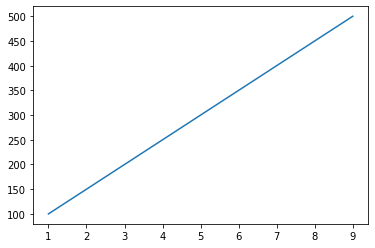

In [195]:
#기본적인 그래프

x = [1,3,5,7,9]
y = [100,200,300,400,500]
plt.plot(x,y)

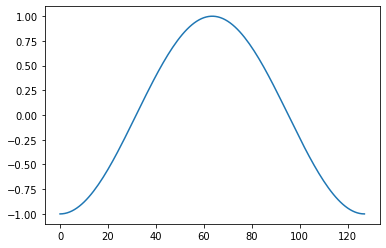

In [197]:
#코사인 함수 그리기
x = np.linspace(-np.pi, np.pi, 128) # 연속적인 값을 갖는 배열
y = np.cos(x) # x 리스트에 대한 cos값 계산
plt.plot(y)

**re**

re는 파이썬 정규표현식(Regular Expression) 라이브러리다.

re를 사용해 문자열을 쉽게 다룰 수 있다.

전처리 과정에서 많이 사용하며, 특정 문자열을 제거하거나 검색 혹은 치환 등에 주로 사용.

**파이썬 정규 표현식**

    . : 줄바꿈을 제외한 모든 문자
    ^ : 문자열의 시작
    $ : 문자열의 끝
    * : 앞에 있는 문자가 0회 이상 반복된 문자열
    + : 앞에 있는 문자가 1회 이상 반복된 문자열
    {m} : 앞 문자를 m회 반복하는 문자열
    {m,n} : 앞 문자를 m~n회 반벅하는 문자열
    ? : 앞 문자가 나오거나 나오지 않는 문자열({0,1}과 동일)
    \d : 숫자
    \D : 숫자가 아닌 문자
    \w : 문자 혹은 숫자
    \W : 문자 혹은 숫자가 아닌 것
    (...) : 괄호 안의 모든 정규 표현식을 만족하는 문자
    [abc] : a, b, c중 한 개의 문자와 일치

**re함수**



In [199]:
import re

- re.compile(pattern)

  compile 함수는 특정 기호를 정규 표현식 객체로 만들어준다. re 라이브러리를 사용하려면 정규 표현식 패턴을 매번 작성해야 하는데, 이 함수를 사용해 패턴을 컴파일 하면 필요할 때마다 사용할 수 있다.



In [201]:
pattern = ' \W+'
re_pattern = re.compile(pattern)
re_pattern

re.compile(r' \W+', re.UNICODE)

- re.search(pattern, string)

  search 함수는 해당 문자열에서 정규 표현식에 해당하는 첫 부분을 찾는다.

In [203]:
 re.search("(\w+)", "wow, it is awesome")
 #탭, 줄바꿈, 공백이 아닌 문자를 모두 찾는 과정, wow 이후로 띄어쓰기가 나와서 그 전까지의 문자인 wow가 결과값으로 나옴

<re.Match object; span=(0, 3), match='wow'>

- re.split(pattern, string)

  split 함수는 해당 문자열에서 특정 패턴으로 문자열을 나눠서 리스트로 만든다.


In [204]:
re.split('\W', 'wow, it is world of word')

['wow', '', 'it', 'is', 'world', 'of', 'word']

- re.sub(pattern, repl, string)

  sub 함수는 문자열(string) 에서 특정 패턴(pattern)을 만족시키는 문자를 사용자가 정의한 문자(repl)로 치환한다.

In [205]:
re.sub("\d", "number", "7 candy")

'number candy'